In [1]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
iris = datasets.load_iris()

In [2]:
# print the label species(setosa, versicolor,virginica)
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [3]:
# print the names of the four features
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
import pandas as pd
data = pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [8]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [9]:
#Model Accuracy to find if the classifier is correct or not
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9777777777777777


In [10]:
#Predict the model
clf.predict([[3,4,5,2]])

array([2])

In [11]:
#Finding which are the most important features
features_imp = pd.Series(clf.feature_importances_,index = iris.feature_names).sort_values(ascending=False)
features_imp

petal width (cm)     0.450615
petal length (cm)    0.429408
sepal length (cm)    0.088196
sepal width (cm)     0.031781
dtype: float64

No handles with labels found to put in legend.


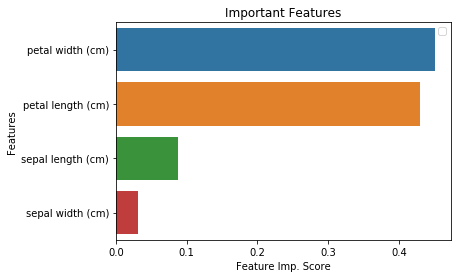

In [13]:
#Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Bar Plot
sns.barplot(x=features_imp,y=features_imp.index)
#Labels to Graph
plt.xlabel('Feature Imp. Score')
plt.ylabel('Features')
plt.title('Important Features')
plt.legend()
plt.show()

In [17]:
from sklearn.model_selection import cross_validate
# Split dataset into features and labels
X=data[['petal length', 'petal width','sepal length']]  # Removed feature "sepal length"
y=data['species']                                       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5)

In [18]:
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9523809523809523


In [ ]:
#Increase the accuracy from 93 to 95%